In [4]:
import pandas as pd

import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

from statsmodels.tsa.stattools import grangercausalitytests

import numpy as np

In [5]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
gbc = data.groupby(by = data['cell_num'])
cell_1 = gbc.get_group('492-1253')
cell_2 = gbc.get_group('493-1253')
cell_3 = gbc.get_group('493-1254')
cell_4 = gbc.get_group('493-1255')

In [7]:
cell_1

,date,cell_num,nr_people,hours,minutes
103,2017-04-16,492-1253,66.0,0.0,0.0
324,2017-04-16,492-1253,64.0,0.0,15.0
545,2017-04-16,492-1253,61.0,0.0,30.0
766,2017-04-16,492-1253,59.0,0.0,45.0
987,2017-04-16,492-1253,58.0,1.0,0.0
...,...,...,...,...,...
2608566,2017-08-16,492-1253,73.0,22.0,45.0
2608787,2017-08-16,492-1253,71.0,23.0,0.0
2609008,2017-08-16,492-1253,71.0,23.0,15.0
2609229,2017-08-16,492-1253,71.0,23.0,30.0


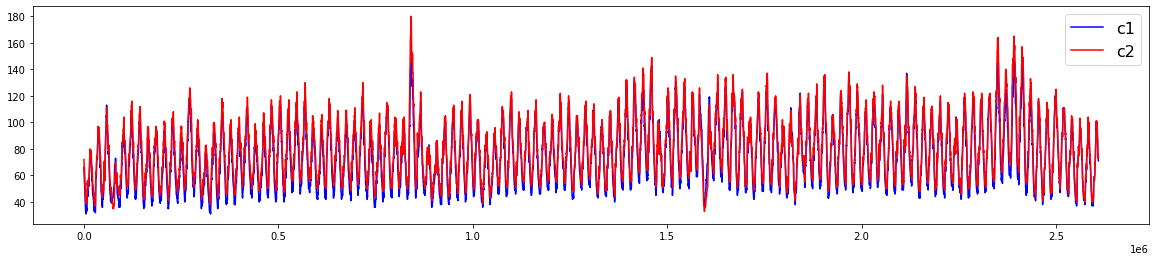

In [11]:
plt.figure(figsize=(20,4))
plt.plot(cell_1['nr_people'], color='b')
plt.plot(cell_2['nr_people'], color='r')

plt.legend(['c1', 'c2'], fontsize=16)

In [23]:
c1 = cell_1['nr_people'][:96].values
c2 = cell_2['nr_people'][:96].values


In [24]:
ts_df = pd.DataFrame(columns=['c2', 'c1'], data=zip(c1,c2))

In [28]:
gc_res = grangercausalitytests(ts_df, 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=35.3035 , p=0.0000  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=36.4547 , p=0.0000  , df=1
likelihood ratio test: chi2=30.8546 , p=0.0000  , df=1
parameter F test:         F=35.3035 , p=0.0000  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.9138 , p=0.0001  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=23.0540 , p=0.0000  , df=2
likelihood ratio test: chi2=20.6180 , p=0.0000  , df=2
parameter F test:         F=10.9138 , p=0.0001  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3390  , p=0.0068  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=14.0766 , p=0.0028  , df=3
likelihood ratio test: chi2=13.1079 , p=0.0044  , df=3
parameter F test:         F=4.3390  , p=0.0068  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3375  , p=0.0031  , df_d

In [29]:
gc_res.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [27]:
gc_res.get(6)

({'ssr_ftest': (2.8125539321946547, 0.015792171249583913, 77.0, 6),
  'ssr_chi2test': (19.72440419980667, 0.0031000675242647924, 6),
  'lrtest': (17.834592176014098, 0.006659129542482131, 6),
  'params_ftest': (2.8125539321946866, 0.015792171249582997, 77.0, 6.0)},
  array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])